**Alunos: Jefferson Costa, Sávio Berdine, Amanda Lasserre, Kevin Andrews, Nicholas Henrique**

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Leitura dos dados:

In [78]:
data = pd.read_csv('train.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
Observando uma correlação das features, para assim selecionarmos quais serão utilizada 

In [80]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


### Banco de Dados

Para termos um banco de dados consistente, deleta-se as colunas que não possui uma quantidade de valores iguais ao número de casos do banco de dados original e que não possuem um valor interessante para ser analisado. Após isso, deleta-se todas as linhas que possuem algum atributo com valor nulo, para que todas as colunas tenham um número de valores igual.

In [4]:
new_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
new_data = new_data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Sex       714 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
 6   Survived  714 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


Transforma-se a coluna "Sex" em valores númericos:

In [5]:
new_data['Sex'].replace(['female','male'],[1,0],inplace=True)
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0


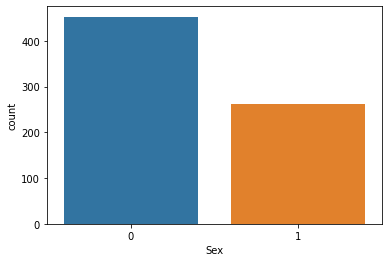

In [65]:
sns.countplot(x='Sex', data= new_data);

In [6]:
x = new_data.drop('Survived', axis=1)
y = new_data['Survived']
y.value_counts()


0    424
1    290
Name: Survived, dtype: int64

Como pode-se ver, infelizmente tem-se uma quantidade maior de casos 0 (pessoa não sobreviveu) do que 1 (pessoa sobreviveu), e isso fará com que a Árvore de Decisão fique melhor treinada para casos 0 do que 1, devido ao desbalanceamento dos casos.

#### Experimentos

Primeiramente, configura-se a Árvore de Decisão com um conjunto de treinamento correspondendo a 50% das observações do banco de dados, e o resto das observações para o conjunto de teste, também é configurado a função como sendo a de Entropia e o número máximo de profundidade da árvore como 5:

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.5, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8235294117647058
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       211
           1       0.82      0.73      0.77       146

    accuracy                           0.82       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.82      0.82      0.82       357



Altera-se o número da profundidade da árvore para 10:

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.5, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7843137254901961
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       211
           1       0.75      0.71      0.73       146

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357



Altera-se o número da profundidade da árvore para 15:

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.5, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7563025210084033
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       211
           1       0.69      0.73      0.71       146

    accuracy                           0.76       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357



Como pôde-se ver, uma maior profundidade da Árvore de Decisão resulta em uma menor *accuracy*, *precision* e *recall*.

Em seguida, altera-se a porcentagem do conjunto de treinamento para 75% do banco de dados, sendo o restante para o conjunto de teste:

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8435754189944135
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       112
           1       0.91      0.64      0.75        67

    accuracy                           0.84       179
   macro avg       0.87      0.80      0.82       179
weighted avg       0.85      0.84      0.84       179



Altera-se o número da profundidade da árvore para 4:

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8491620111731844
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.80      0.79      0.80        67

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Altera-se a função para a Gini:

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       112
           1       0.85      0.75      0.79        67

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



Nos próximos testes foi-se alterado o valor de *random_state* para variar a seleção dos casos para *x_train*, *x_test*, *y_train* e *y_test*.

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       103
           1       0.81      0.71      0.76        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=25)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7541899441340782
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       103
           1       0.70      0.74      0.72        76

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



In [15]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=40)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       101
           1       0.77      0.74      0.76        78

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=13)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8044692737430168
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       103
           1       0.85      0.66      0.74        76

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



O *random_state=1* mostrou os melhores resultados.

Altera-se a profundidade máxima da árvore para 5:

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       112
           1       0.84      0.76      0.80        67

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Como pôde-se ver, a melhor Árvore de Decisão que foi obtida foi a que teve os seguintes parâmetros: *train_size=0.75*, *random_state=1*, *max_depth=5* e *criterion=gini*.

Alteram-se os valores de *max_leaf_nodes* (número máximo de folhas), *min_samples_leaf* (número mínimo de amostras para o nó ser considerado uma folha) e *min_samples_split* (número mínimo de amostras para dividir um nó interno):

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8212290502793296
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       112
           1       0.89      0.60      0.71        67

    accuracy                           0.82       179
   macro avg       0.84      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       112
           1       0.85      0.75      0.79        67

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       112
           1       0.85      0.75      0.79        67

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8268156424581006
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.78      0.75      0.76        67

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [22]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       112
           1       0.85      0.75      0.79        67

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [23]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=15)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       112
           1       0.85      0.75      0.79        67

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



Analisando-se os experimentos, pode-se ver que um aumento no *max_leaf_nodes* provoca uma melhora nos resultados, enquanto um aumento no *min_samples_leaf* provoca uma piora nos resultados, já a alteração em *min_samples_split* não provoca nenhuma mudança nos resultados.

### Utiliza-se uma nova base de dados:

In [24]:
new_data2 = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
new_data2 = new_data2.dropna()
new_data2['Sex'].replace(['female','male'],[1,0],inplace=True)
new_data2['Embarked'].replace(['S','C', 'Q'],[0,1,2],inplace=True)
new_data2.info()
new_data2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0
2,1,1,38.0,1,0,71.2833,1,1
3,3,1,26.0,0,0,7.9250,0,1
4,1,1,35.0,1,0,53.1000,0,1
5,3,0,35.0,0,0,8.0500,0,0


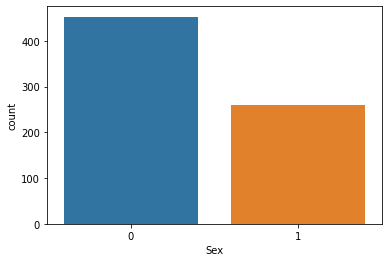

In [67]:
sns.countplot(x='Sex', data= new_data2);

In [25]:
x = new_data2.drop('Survived', axis=1)
y = new_data2['Survived']

#### Experimentos

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7921348314606742
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       102
           1       0.81      0.67      0.73        76

    accuracy                           0.79       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



Alteram-se os valores de *random_state* :

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8033707865168539
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.80      0.70      0.75        74

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [28]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=13)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8033707865168539
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       108
           1       0.73      0.80      0.76        70

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [29]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=40)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7865168539325843
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       110
           1       0.81      0.57      0.67        68

    accuracy                           0.79       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.79      0.79      0.78       178



Altera-se a função para Entropia:

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7921348314606742
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       104
           1       0.82      0.64      0.72        74

    accuracy                           0.79       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.79      0.79       178



Conclui-se que o uso de um novo banco de dados não trouxe melhoras nos resultados obtidos.

### Utiliza-se uma base de dados balanciada por replicação:

Como a base de dados é desbalanceada, podemos tentar um balanceamento na base antes de testar, inicialmente repetiremos os primeiros experimentos com uma base de dados balanceada a partir de repetição de dados que faltam.

In [31]:
new_data3 = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].sort_values(by= ['Survived'])

new_data3['Sex'].replace(['female','male'],[1,0],inplace=True)

new_data4 = new_data3.copy()


toomany1 = 0
for i in range(891):
    s = new_data3['Survived']
    if(s[i+1] == 0):
        new_data3.drop((i+1),axis=0,inplace=True)
    elif(s[i+1] == 1 and toomany1 < 135):
        new_data3.drop((i+1),axis=0,inplace=True)
        toomany1 = toomany1 + 1
    
new_data4 = new_data4.append(new_data3, ignore_index=True)

new_data4 = new_data4.dropna()
new_data4.info()
new_data4.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    895 non-null    int64  
 1   Sex       895 non-null    int64  
 2   Age       895 non-null    float64
 3   SibSp     895 non-null    int64  
 4   Parch     895 non-null    int64  
 5   Fare      895 non-null    float64
 6   Survived  895 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.9 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,3,0,32.0,0,0,7.8958,0
2,3,0,22.0,0,0,7.8958,0
5,3,0,40.5,0,0,7.7500,0
7,3,0,39.0,0,0,7.9250,0


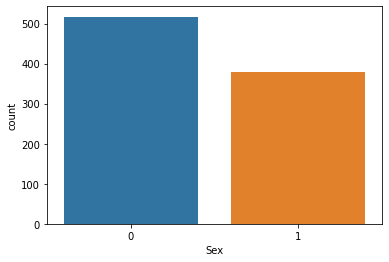

In [68]:
sns.countplot(x='Sex', data= new_data4);

In [32]:
x = new_data4.drop('Survived', axis=1)
y = new_data4['Survived']

#### Experimentos [Dataset balanceado através da replicação de casos 1]

Refazemos os experimentos utilizando o dataset balanceado

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8660714285714286
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       102
           1       0.88      0.88      0.88       122

    accuracy                           0.87       224
   macro avg       0.86      0.86      0.86       224
weighted avg       0.87      0.87      0.87       224



Alteram-se os valores de *random_state* :

In [34]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8214285714285714
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       109
           1       0.82      0.83      0.83       115

    accuracy                           0.82       224
   macro avg       0.82      0.82      0.82       224
weighted avg       0.82      0.82      0.82       224



In [35]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=13)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.78125
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       108
           1       0.82      0.74      0.78       116

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.78      0.78      0.78       224



In [36]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=40)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7901785714285714
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       106
           1       0.81      0.78      0.80       118

    accuracy                           0.79       224
   macro avg       0.79      0.79      0.79       224
weighted avg       0.79      0.79      0.79       224



Altera-se a função para Entropia:

In [37]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8303571428571429
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       109
           1       0.92      0.73      0.82       115

    accuracy                           0.83       224
   macro avg       0.84      0.83      0.83       224
weighted avg       0.85      0.83      0.83       224



Nota-se algumas mudanças, os resultados tendem a melhorar quando comparado com seus semelhantes não-balanceados, porém é uma melhora pequena.

### Utiliza-se uma base de dados balanciada por remoção:

Agora fazemos um novo dataset balanceado, dessa vez nos removeremos dados com 'Survived' == 0 até que o dataset fique igual

In [38]:
new_data5 = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].sort_values(by= ['Survived'])

new_data5['Sex'].replace(['female','male'],[1,0],inplace=True)


toomany0 = 0
for i in range(891):
    s = new_data5['Survived']
    if(s[i+1] == 0 and toomany0 < 135):
        new_data5.drop((i+1),axis=0,inplace=True)
        toomany0 = toomany0 + 1
    
new_data5 = new_data5.dropna()
new_data5.info()
new_data5.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 520 to 446
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    605 non-null    int64  
 1   Sex       605 non-null    int64  
 2   Age       605 non-null    float64
 3   SibSp     605 non-null    int64  
 4   Parch     605 non-null    int64  
 5   Fare      605 non-null    float64
 6   Survived  605 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 37.8 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
520,3,0,32.0,0,0,7.8958,0
522,3,0,22.0,0,0,7.8958,0
526,3,0,40.5,0,0,7.7500,0
529,3,0,39.0,0,0,7.9250,0
530,2,0,23.0,2,1,11.5000,0


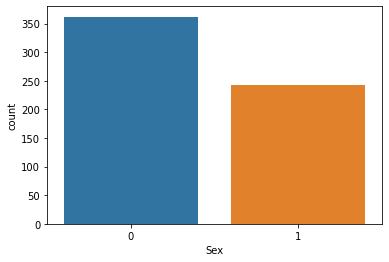

In [69]:
sns.countplot(x='Sex', data= new_data5);

In [39]:
x = new_data5.drop('Survived', axis=1)
y = new_data5['Survived']

#### Experimentos [Dataset balanceado através da remoção de casos 0]

Refazemos os experimentos utilizando o este dataset

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7894736842105263
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        80
           1       0.74      0.86      0.79        72

    accuracy                           0.79       152
   macro avg       0.80      0.79      0.79       152
weighted avg       0.80      0.79      0.79       152



Alteram-se os valores de *random_state* :

In [41]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7697368421052632
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        78
           1       0.73      0.84      0.78        74

    accuracy                           0.77       152
   macro avg       0.78      0.77      0.77       152
weighted avg       0.78      0.77      0.77       152



In [42]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=13)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7960526315789473
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        84
           1       0.78      0.76      0.77        68

    accuracy                           0.80       152
   macro avg       0.79      0.79      0.79       152
weighted avg       0.80      0.80      0.80       152



In [43]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=40)
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7828947368421053
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        87
           1       0.72      0.82      0.76        65

    accuracy                           0.78       152
   macro avg       0.78      0.79      0.78       152
weighted avg       0.79      0.78      0.78       152



In [44]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.756578947368421
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        78
           1       0.71      0.85      0.77        74

    accuracy                           0.76       152
   macro avg       0.77      0.76      0.76       152
weighted avg       0.77      0.76      0.75       152



Os resultados desse dataset deixam a desejar, sendo piores que os iniciais, provavelmente pela baixo número de dados.

**Usaremos o banco de dados original para fazer experimentos com o parâmetro *min_samples_leaf*, que é o parâmetro que
indica o número mínimo de amostras necessárias para estar em uma folha, e o *min_samples_split* que nos diz o número mínimo de amostrar necessárias para dividir um nó interno**

In [45]:
new_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
new_data = new_data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Sex       714 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
 6   Survived  714 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [46]:
new_data['Sex'].replace(['female','male'],[1,0],inplace=True)
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0


In [47]:
x = new_data.drop('Survived', axis=1)
y = new_data['Survived']

In [48]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf = 50, min_samples_split=50)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8044692737430168
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       112
           1       0.97      0.49      0.65        67

    accuracy                           0.80       179
   macro avg       0.87      0.74      0.76       179
weighted avg       0.84      0.80      0.79       179



In [49]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf = 50, min_samples_split = 50)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8044692737430168
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       112
           1       0.97      0.49      0.65        67

    accuracy                           0.80       179
   macro avg       0.87      0.74      0.76       179
weighted avg       0.84      0.80      0.79       179



Obtivemos resultados idênticos tanto para o critério *gini* quanto para o *entropy* quando consideramos o *min_samples_leaf* e o *min_samples_split* de mesmo tamanho.

Agora testaremos se obteremos resultados idênticos para ambos os critérios se diminuirmos tanto *min_samples_leaf* quanto *min_samples_split* pela metade.

In [50]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf = 25, min_samples_split = 25)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7821229050279329
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       112
           1       0.73      0.66      0.69        67

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [51]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf = 25, min_samples_split = 25)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7821229050279329
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       112
           1       0.73      0.66      0.69        67

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



Observarmos que se mantivermos um mesmo valor para os parâmetros *min_samples_leaf* e *min_samples_split*, a nossa árvore de decisão será a mesma independente do critério escolhido.

**Faremos agora o mesmo experimento com o segundo dataSet**

In [52]:
new_data2 = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
new_data2 = new_data2.dropna()
new_data2['Sex'].replace(['female','male'],[1,0],inplace=True)
new_data2['Embarked'].replace(['S','C', 'Q'],[0,1,2],inplace=True)
new_data2.info()
new_data2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0
2,1,1,38.0,1,0,71.2833,1,1
3,3,1,26.0,0,0,7.9250,0,1
4,1,1,35.0,1,0,53.1000,0,1
5,3,0,35.0,0,0,8.0500,0,0


In [53]:
x = new_data2.drop('Survived', axis=1)
y = new_data2['Survived']

In [54]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf = 50, min_samples_split=50)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7921348314606742
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       102
           1       0.95      0.54      0.69        76

    accuracy                           0.79       178
   macro avg       0.85      0.76      0.77       178
weighted avg       0.83      0.79      0.78       178



In [55]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf = 50, min_samples_split = 50)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7921348314606742
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       102
           1       0.95      0.54      0.69        76

    accuracy                           0.79       178
   macro avg       0.85      0.76      0.77       178
weighted avg       0.83      0.79      0.78       178



Mais uma vez obtivemos resultados idênticos tanto para o critério *gini* quanto para o *entropy* quando consideramos o *min_samples_leaf* e o *min_samples_split* de mesmo tamanho.

Agora testaremos se obteremos resultados idênticos para ambos os critérios se diminuirmos tanto *min_samples_leaf* quanto *min_samples_split* pela metade.

In [56]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf = 25, min_samples_split = 25)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7921348314606742
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.73      0.82      0.77        76

    accuracy                           0.79       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.80      0.79      0.79       178



In [57]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf = 25, min_samples_split = 25)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7921348314606742
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.73      0.82      0.77        76

    accuracy                           0.79       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.80      0.79      0.79       178



Observarmos que se mantivermos um mesmo valor para os parâmetros *min_samples_leaf* e *min_samples_split*, a nossa árvore de decisão será a mesma independente do critério escolhido também para este conjunto.

**Faremos agora o mesmo experimento usando o dataSet que foi criado com a ideia da replicação**

In [58]:
new_data3 = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].sort_values(by= ['Survived'])

new_data3['Sex'].replace(['female','male'],[1,0],inplace=True)

new_data4 = new_data3.copy()


toomany1 = 0
for i in range(891):
    s = new_data3['Survived']
    if(s[i+1] == 0):
        new_data3.drop((i+1),axis=0,inplace=True)
    elif(s[i+1] == 1 and toomany1 < 135):
        new_data3.drop((i+1),axis=0,inplace=True)
        toomany1 = toomany1 + 1
    
new_data4 = new_data4.append(new_data3, ignore_index=True)

new_data4 = new_data4.dropna()
new_data4.info()
new_data4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    895 non-null    int64  
 1   Sex       895 non-null    int64  
 2   Age       895 non-null    float64
 3   SibSp     895 non-null    int64  
 4   Parch     895 non-null    int64  
 5   Fare      895 non-null    float64
 6   Survived  895 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.9 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,3,0,32.0,0,0,7.8958,0
2,3,0,22.0,0,0,7.8958,0
5,3,0,40.5,0,0,7.7500,0
7,3,0,39.0,0,0,7.9250,0


In [59]:
x = new_data4.drop('Survived', axis=1)
y = new_data4['Survived']

In [60]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf = 50, min_samples_split=50)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8169642857142857
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       102
           1       0.86      0.80      0.83       122

    accuracy                           0.82       224
   macro avg       0.82      0.82      0.82       224
weighted avg       0.82      0.82      0.82       224



In [61]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf = 50, min_samples_split = 50)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.8169642857142857
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       102
           1       0.86      0.80      0.83       122

    accuracy                           0.82       224
   macro avg       0.82      0.82      0.82       224
weighted avg       0.82      0.82      0.82       224



Mais uma vez obtivemos resultados idênticos tanto para o critério *gini* quanto para o *entropy* quando consideramos o *min_samples_leaf* e o *min_samples_split* de mesmo tamanho.

Agora testaremos se obteremos resultados idênticos para ambos os critérios se diminuirmos tanto *min_samples_leaf* quanto *min_samples_split* pela metade.

In [62]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=None, min_samples_leaf = 25, min_samples_split = 25)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7946428571428571
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       102
           1       0.82      0.80      0.81       122

    accuracy                           0.79       224
   macro avg       0.79      0.79      0.79       224
weighted avg       0.80      0.79      0.79       224



In [63]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=None, min_samples_leaf = 25, min_samples_split = 25)
tree.fit(x_train,y_train)
predicted = tree.predict(x_val)
a_s = accuracy_score(y_val, predicted)
print(a_s)
report = classification_report(y_val, predicted)
print(report)

0.7946428571428571
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       102
           1       0.82      0.80      0.81       122

    accuracy                           0.79       224
   macro avg       0.79      0.79      0.79       224
weighted avg       0.80      0.79      0.79       224



Realizamos o mesmo experimentos para três dataSets distintos e percebemos que independe do dataset que usarmos, os resultados são idênticos tanto para o critério *gini* quanto para o *entropy* quando consideramos o *min_samples_leaf* e o *min_samples_split* de mesmo tamanho.